# 정부혁신1번가 - 정부혁신 홈페이지 분석
* 정부혁신 제안(목록) > 정부혁신국민포럼 

출처 : https://www.innogov.go.kr/ucms/ogp/sug/list.do?menuNo=300011

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 스타일을 지정
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

# 주피터 노트북 안에서 그래프가 표시되도록 함
%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_csv("data/suggestion.csv")

df.shape

(171, 8)

## 데이터 미리보기

In [3]:
df.head()

,sgId,title,category,content,start,end,vote,author
0,206,빌딩 화장실,안전,상가 건물이나 기타 영업용 빌딩을 건축할 때 화장실은 제발 남녀 같이 사용하는 화장...,2019.06.16,2019.09.13,0,써니 86
1,205,조부모 아이돌봄 수당 지급,보건복지,조부모 아이돌봄 수당 지급□도입배경○우리나라의 저출산 문제가 심화되고 있는데 경제적...,2019.06.15,2019.09.12,1,혁신리더
2,204,문화 유적지(궁궐이나 왕릉 등)에 장애인을 위한 해설사를 배치,인권/평등,"현재,,, 궁이나 릉 같은 문화유적지에는 한국어를 비롯한 여러국가의 언어들로 ...",2019.06.14,2019.09.11,1,ynkim97
3,203,업체들의 어음 기간을 줄여주세요,상생협력,이번정부에 들어서 업체들이 갈수록 힘이 듭니다.경기가 안 좋은 탓도 없지 않아 있겠...,2019.06.13,2019.09.10,2,더나은나라
4,202,집앞 불법주차에 대한 신고 개선과 제재를 강화시켜주세요,안전,주차공간이 부족한 주택가에 차도 인도 모두를 침범하는 불법주차 차량이 너무나 많고신...,2019.06.12,2019.09.09,1,malakh


In [4]:
df.tail(1)

,sgId,title,category,content,start,end,vote,author
170,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비


## 요약

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
sgId        171 non-null int64
title       171 non-null object
category    171 non-null object
content     169 non-null object
start       171 non-null object
end         171 non-null object
vote        171 non-null int64
author      168 non-null object
dtypes: int64(2), object(6)
memory usage: 10.8+ KB


In [6]:
# Shift + tab 키를 누르면 도움말(docstring)을 보실 수 있습니다.
df.describe(include='all')

,sgId,title,category,content,start,end,vote,author
count,171.000000,171,171,169,171,171,171.000000,168
unique,NaN,171,11,169,106,106,NaN,128
top,NaN,안전한 화장실,보건복지,"최근 일부 교수들의연구비 휭령 기사를 보고개탄을 금치 못하며,인문사회 및 과학기술분...",2019.06.12,2019.09.09,NaN,생태조성
freq,NaN,1,28,1,11,11,NaN,10
mean,106.766082,NaN,NaN,NaN,NaN,NaN,44.625731,NaN
std,63.497876,NaN,NaN,NaN,NaN,NaN,223.138523,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,50.500000,NaN,NaN,NaN,NaN,NaN,1.500000,NaN
50%,120.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,163.500000,NaN,NaN,NaN,NaN,NaN,7.500000,NaN


In [7]:
df['category'].value_counts()

보건복지     28
일반행정     27
기타       25
안전       22
인권/평등    16
상생협력     12
환경        9
국민참여      9
반부패청렴     8
사회통합      8
공동체       7
Name: category, dtype: int64

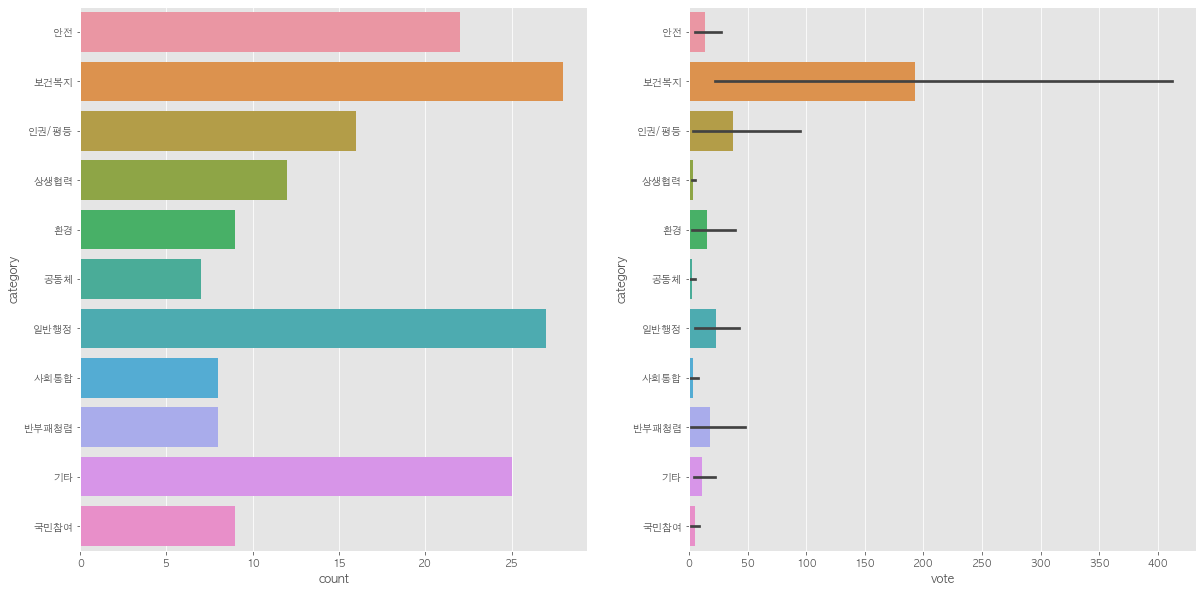

In [8]:
figure,(ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches(20,10)
# 카테고리별 제안수
sns.countplot(data=df, y="category", ax=ax1)
# 카테고리별 평균 투표수
sns.barplot(data=df, x="vote", y="category", ax=ax2)

In [9]:
df.groupby(['category'])['vote'].sum().reset_index().sort_values('vote', ascending=False)

,category,vote
4,보건복지,5410
9,일반행정,619
8,인권/평등,595
7,안전,307
2,기타,274
3,반부패청렴,146
10,환경,138
1,국민참여,46
6,상생협력,45
5,사회통합,30


In [10]:
# 카테고리별 전체 투표수
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum()) \
                            .reset_index().sort_values('vote', ascending=False)
df_category_vote.head()

,category,vote
4,보건복지,5410
9,일반행정,619
8,인권/평등,595
7,안전,307
2,기타,274


# 기간

In [11]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df[['start', 'end']].head()

,start,end
0,2019-06-16,2019-09-13
1,2019-06-15,2019-09-12
2,2019-06-14,2019-09-11
3,2019-06-13,2019-09-10
4,2019-06-12,2019-09-09


In [12]:
df.dtypes

sgId                 int64
title               object
category            object
content             object
start       datetime64[ns]
end         datetime64[ns]
vote                 int64
author              object
dtype: object

In [13]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str) +"-"+ df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.dayofweek

In [14]:
df[['start-date', 'start-month', 'start-weekday']].head()

,start-date,start-month,start-weekday
0,2019-06-16,2019-6,6
1,2019-06-15,2019-6,5
2,2019-06-14,2019-6,4
3,2019-06-13,2019-6,3
4,2019-06-12,2019-6,2


https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.dt.dayofweek.html

In [15]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df['weekday'] = df['start-weekday'].apply(lambda x : weekday_map[x])
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2019-6,6,일
1,2019-6,5,토
2,2019-6,4,금
3,2019-6,3,목
4,2019-6,2,수


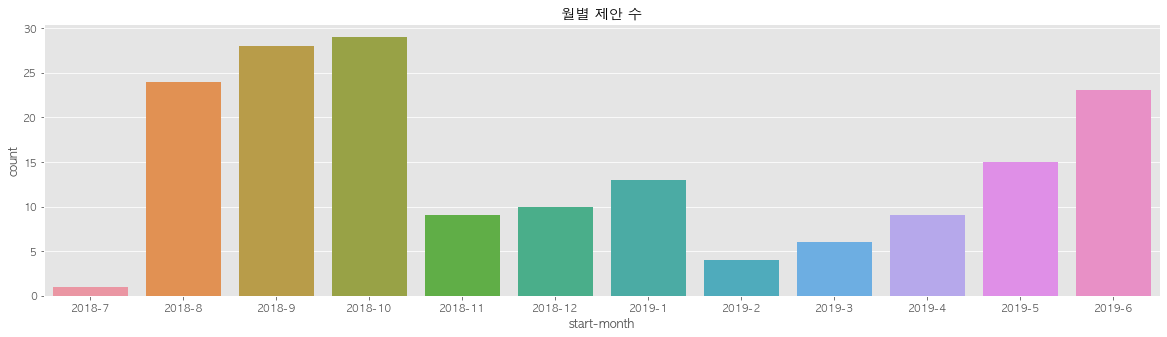

In [16]:
plt.figure(figsize=(20,5))
plt.title('월별 제안 수')
sns.countplot(data=df.sort_values(by="start-date", ascending=True), x="start-month")

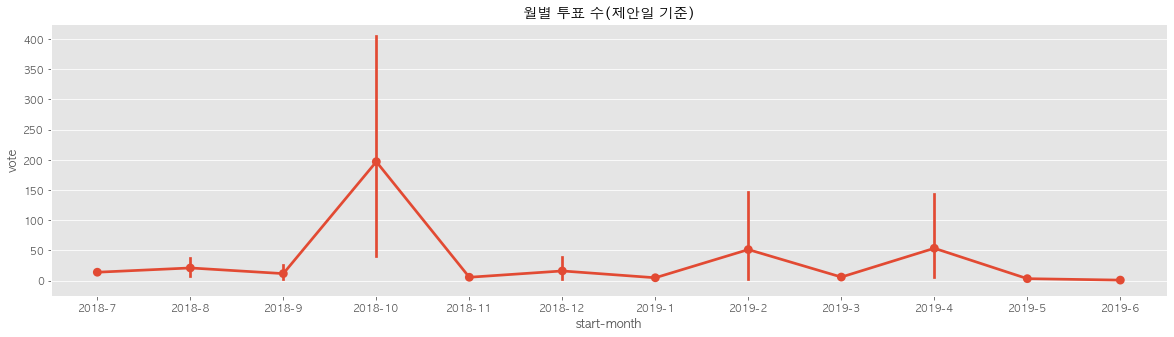

In [17]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

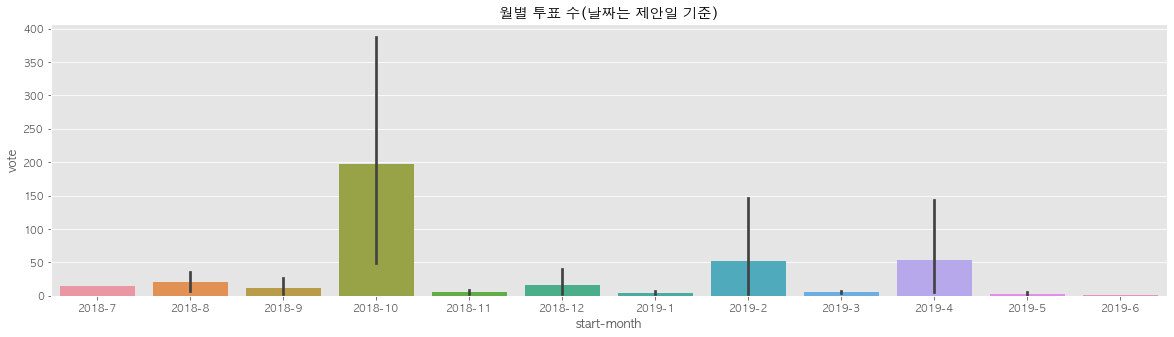

In [18]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(날짜는 제안일 기준)')
sns.barplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

10월에 가장많은 투표가 있었는데 편차가 큰것으로 보아 일부 제안이 다른 제안에 비해 많은 투표를 받은 것이라고 가설을 세워볼 수 있을거 같다.
2월에는 제안수는 적지만 투표수는 많다.

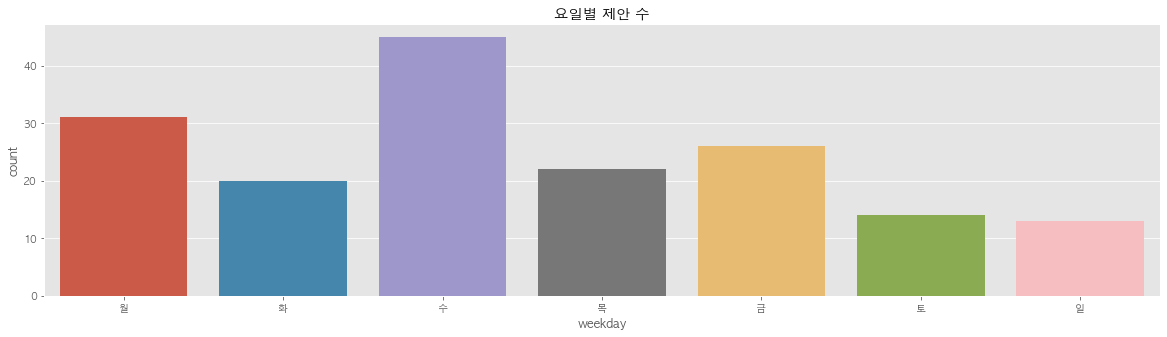

In [19]:
plt.figure(figsize=(20,5))
plt.title('요일별 제안 수')
sns.countplot(data=df.sort_values(by="start-weekday"), x="weekday")

* 투표수는 날짜를 추출할 수 없어서 제안이 들어온 날을 기준으로 집계됨

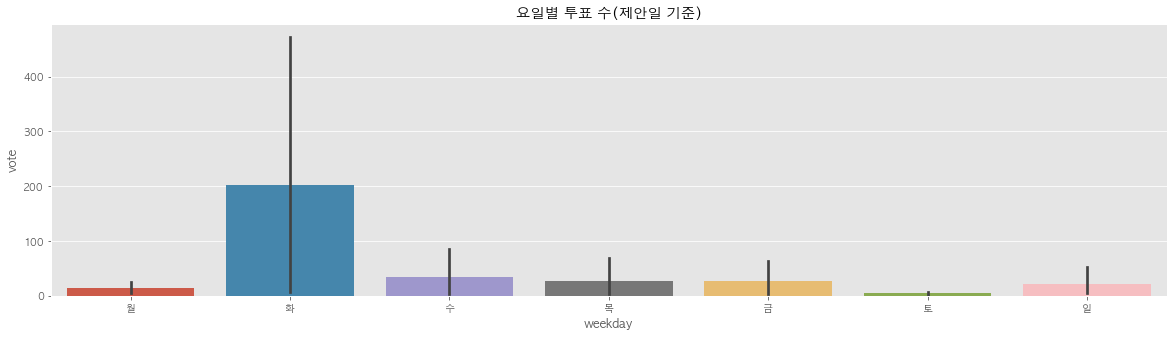

In [20]:
plt.figure(figsize=(20,5))
plt.title('요일별 투표 수(제안일 기준)')
sns.barplot(data=df.sort_values(by="start-weekday"), x="weekday", y="vote")

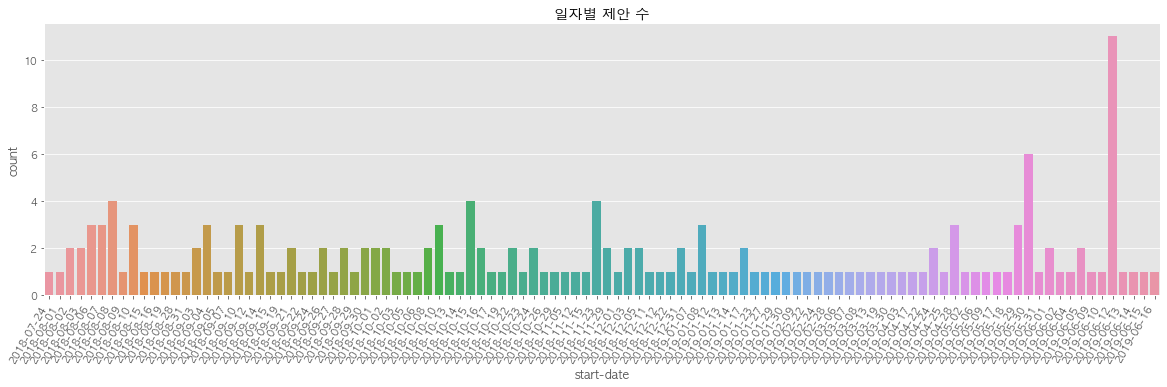

In [21]:
plt.figure(figsize=(20,5))
plt.title('일자별 제안 수')
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df.sort_values(by="start-date"), x="start-date")

In [22]:
df_06_10 = df[df['start'] > '2019-06-10']
df_06_10['start-date'].value_counts()

2019-06-12    11
2019-06-13     1
2019-06-14     1
2019-06-16     1
2019-06-15     1
Name: start-date, dtype: int64

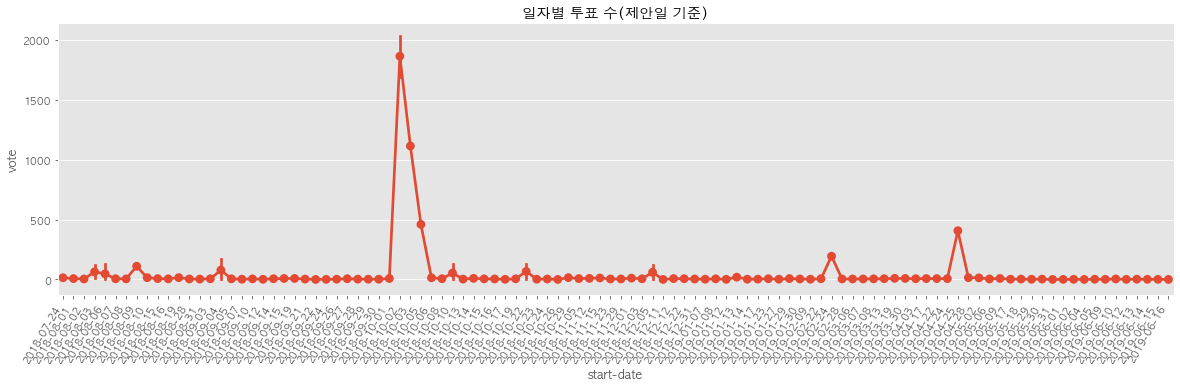

In [23]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('일자별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date"), x="start-date", y="vote")

In [24]:
df.head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday
0,206,빌딩 화장실,안전,상가 건물이나 기타 영업용 빌딩을 건축할 때 화장실은 제발 남녀 같이 사용하는 화장...,2019-06-16,2019-09-13,0,써니 86,2019-06-16,2019-6,6,일
1,205,조부모 아이돌봄 수당 지급,보건복지,조부모 아이돌봄 수당 지급□도입배경○우리나라의 저출산 문제가 심화되고 있는데 경제적...,2019-06-15,2019-09-12,1,혁신리더,2019-06-15,2019-6,5,토
2,204,문화 유적지(궁궐이나 왕릉 등)에 장애인을 위한 해설사를 배치,인권/평등,"현재,,, 궁이나 릉 같은 문화유적지에는 한국어를 비롯한 여러국가의 언어들로 ...",2019-06-14,2019-09-11,1,ynkim97,2019-06-14,2019-6,4,금
3,203,업체들의 어음 기간을 줄여주세요,상생협력,이번정부에 들어서 업체들이 갈수록 힘이 듭니다.경기가 안 좋은 탓도 없지 않아 있겠...,2019-06-13,2019-09-10,2,더나은나라,2019-06-13,2019-6,3,목
4,202,집앞 불법주차에 대한 신고 개선과 제재를 강화시켜주세요,안전,주차공간이 부족한 주택가에 차도 인도 모두를 침범하는 불법주차 차량이 너무나 많고신...,2019-06-12,2019-09-09,1,malakh,2019-06-12,2019-6,2,수


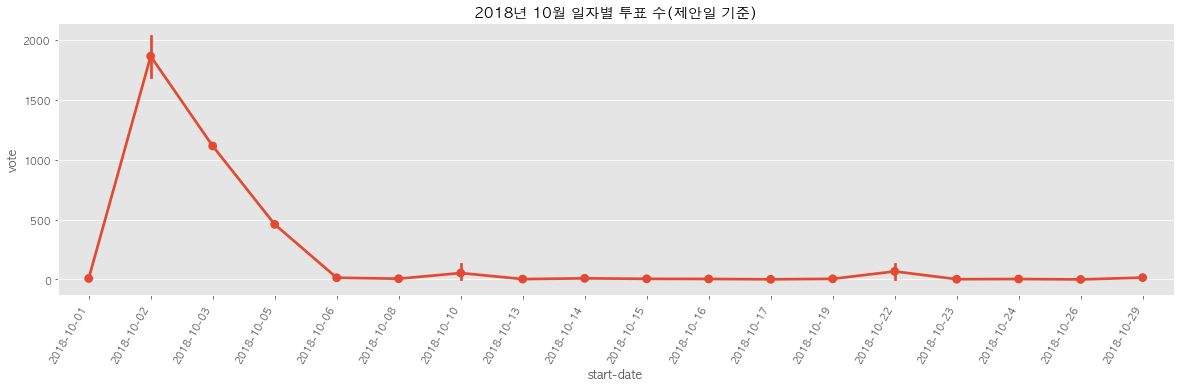

In [25]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2018년 10월 일자별 투표 수(제안일 기준)')
df_2018_10 = df[(df["start"] >= "2018-10-01") & (df["start"] < "2018-11-01")]
sns.pointplot(data=df_2018_10.sort_values(by="start-date"), x="start-date", y="vote")

In [26]:
df.loc[df["vote"] > 2000, ["sgId", "start", "title", "category", "content"]]

,sgId,start,title,category,content
114,64,2018-10-02,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...


해당 정책 링크 :
https://www.innogov.go.kr/ucms/ogp/sug/view.do?menuNo=300011&sgId=64

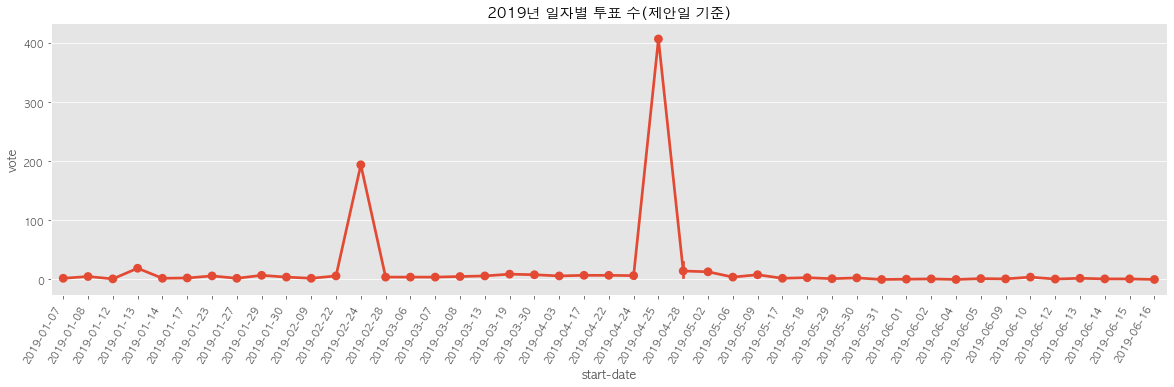

In [27]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2019년 일자별 투표 수(제안일 기준)')
df_2019 = df[df["start"] > '2018-12-31']
sns.pointplot(data=df_2019.sort_values(by="start-date"), x="start-date", y="vote")

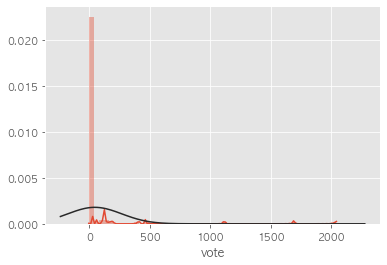

In [28]:
from scipy.stats import norm
sns.distplot(df['vote'], fit=norm)

In [29]:
# 종료된 제안 수
df[df['end'] < '2019-06-17'].shape

(123, 12)

In [30]:
# 종료 여부 컬럼 생성
df['close'] = df['end'] < '2019-06-17'

In [31]:
# 종료 여부 건 비교
df['close'].value_counts()

True     123
False     48
Name: close, dtype: int64

In [32]:
preview_columns = ["sgId", "title", "category", "content", "vote"]
df_top_vote = df.sort_values(by='vote', ascending=False).head(10)
df_top_vote[preview_columns]

,sgId,title,category,content,vote
114,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037
115,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693
113,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115
112,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460
41,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,407
54,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194
142,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167
95,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133
162,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132
107,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126


In [33]:
df_vote_100 = df.loc[df['vote'] > 100, preview_columns]
print('100개 이상 투표를 받은 제안 :', len(df_vote_100))
df_vote_100

100개 이상 투표를 받은 제안 : 13


,sgId,title,category,content,vote
41,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,407
54,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194
75,131,공직자 임용 및 선출직 입후보 배제 원칙 강화,반부패청렴,선출직이든 정무직이든 일반직이든 입법 행정 사법 3부 및 전국 지자체의모든 공무원은...,119
95,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133
107,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126
112,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460
113,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115
114,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037
115,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693
142,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167


In [34]:
# 가장 많은 건 수가 있는 일반행정 분야의 제안을 투표수 별로 정렬해서 봅니다.
df[df['category'] == '일반행정'].sort_values(by='vote', ascending=False).head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
54,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,194,무한소,2019-02-24,2019-2,6,일,True
142,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,화,True
107,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,수,True
106,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,수,True
24,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,9,hyusco,2019-05-30,2019-5,3,목,False


## WordCloud

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [36]:
from konlpy.tag import Mecab
mecab = Mecab()

In [37]:
# mecab 으로 명사만 추출합니다.
%time mecab_content_nouns = mecab.nouns(''.join(str(df['content'].fillna(''))))
mecab_content_nouns[-10:]

CPU times: user 19.9 ms, sys: 61 ms, total: 81 ms
Wall time: 341 ms


['어린이집', '차량', '내', '어린이', '질식', '사고', '발생', '이', '가지', '대책']

In [38]:
def mecab_nouns_wordcloud(content):
    mecab_content_nouns = mecab.nouns(''.join(str(content.fillna(''))))
    displayWordCloud(' '.join(mecab_content_nouns))

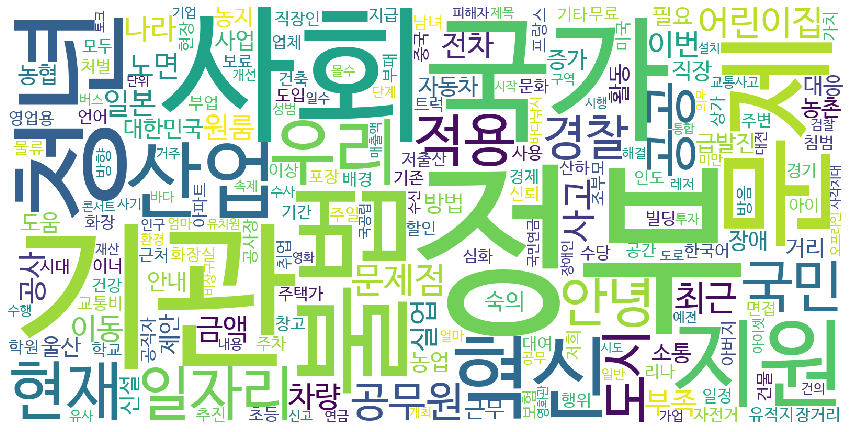

In [39]:
mecab_nouns_wordcloud(df['content'])

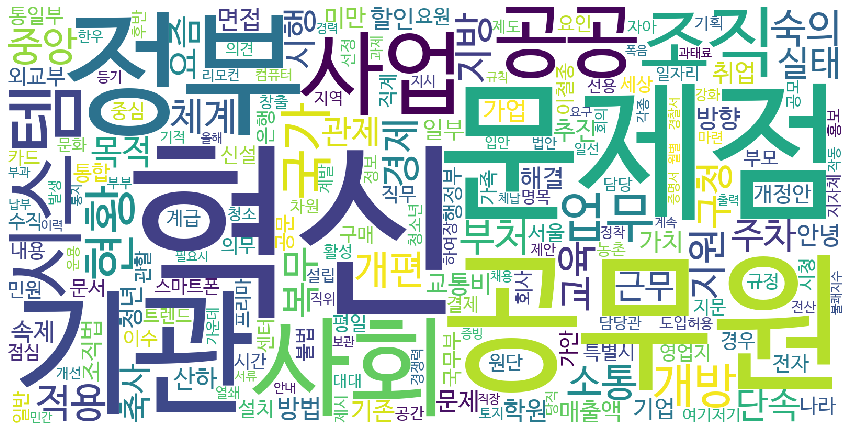

In [40]:
content = df.loc[df['category'] == "일반행정", "content"]
mecab_nouns_wordcloud(content)

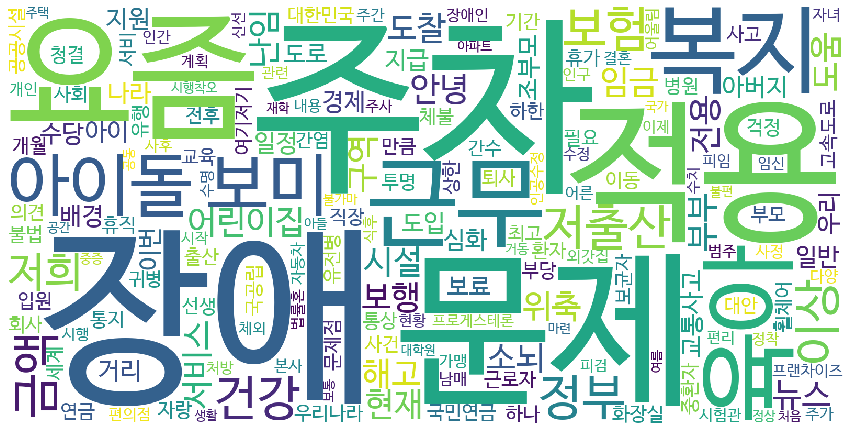

In [41]:
content = df.loc[df['category'] == "보건복지", "content"]
mecab_nouns_wordcloud(content)

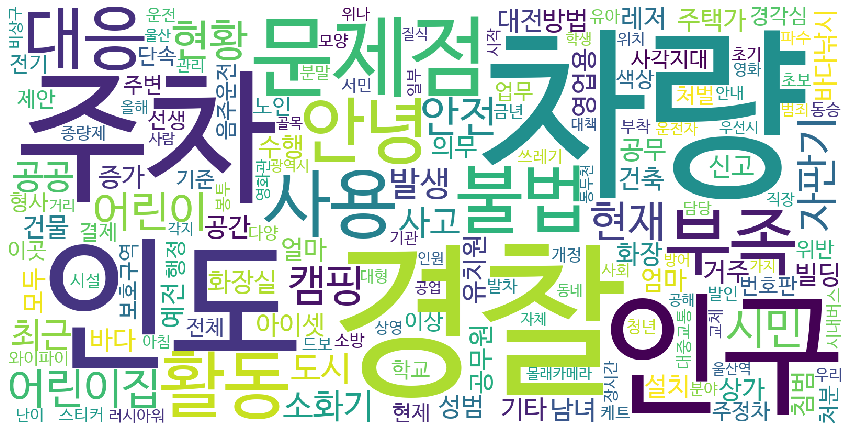

In [42]:
content = df.loc[df['category'] == "안전", "content"]
mecab_nouns_wordcloud(content)

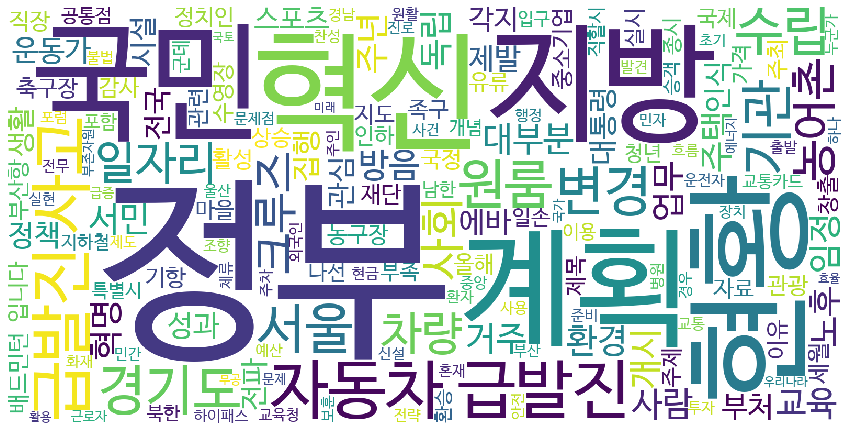

In [43]:
content = df.loc[df['category'] == "기타", "content"]
mecab_nouns_wordcloud(content)

In [44]:
import re
p = r'.*(난임|불임|임신).*'
pregnant = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
pregnant.shape

(5, 13)

In [45]:
pregnant.sort_values(by="vote", ascending=False)

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
114,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018-10-02,2018-12-30,2037,엄마란소리,2018-10-02,2018-10,1,화,True
115,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018-10-02,2018-12-30,1693,곰돌이네,2018-10-02,2018-10,1,화,True
113,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018-10-03,2018-12-31,1115,알지온,2018-10-03,2018-10,2,수,True
37,169,체당금 관련 법안에 관해서 건의드립니다.,보건복지,우선 저는 10년가까이 근무했던 회사에서 퇴사한 후 2년이 다되도록 체불임금 및 퇴...,2019-05-02,2019-07-30,13,꿀떵이맘,2019-05-02,2019-5,3,목,False
105,74,산부인과 초음파비용,보건복지,결혼한 후 1년이내 피임을 하지않는범주에서 자녀가생기지 않으면 난임부부라고 말합니다...,2018-10-13,2019-01-10,3,모모,2018-10-13,2018-10,5,토,True


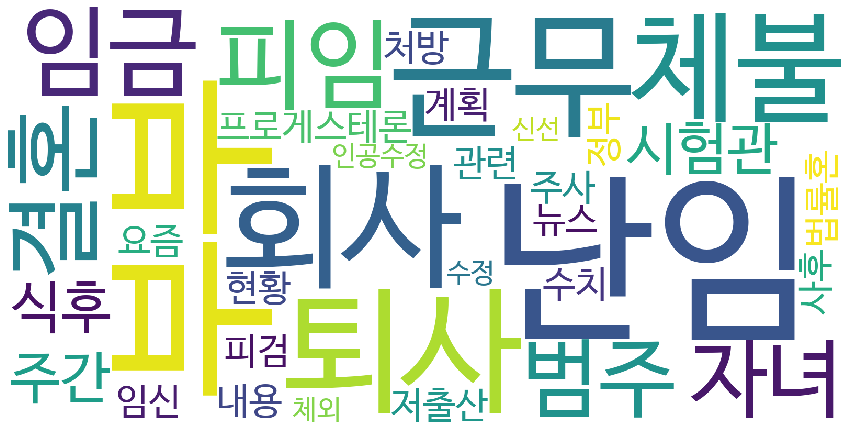

In [46]:
content = pregnant["content"]
mecab_nouns_wordcloud(content)

In [47]:
p = r'.*(미세먼지).*'
air = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
air

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
51,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019-03-07,2019-06-04,4,봉팔버미,2019-03-07,2019-3,3,목,True
127,52,저속으로 이용되고 있는 수도권 고속도로 운영방식 개선,기타,(현 황)정부에서는 교통의 원활한 흐름을 위해 정부예산 또는 민간투자(민자)를 ...,2018-09-22,2018-12-20,0,사회적가치,2018-09-22,2018-9,5,토,True


In [48]:
p = r'.*(자동차).*'
car = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
car

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
17,189,간병인비에 대한 국민건강보험공단 차원에서의 지원정책,보건복지,"저희 아버지가 이번에 교통사고를 당하셨습니다. 도로도 아니고, 일반 거리에서 차가 ...",2019-06-05,2019-09-02,2,행운의여신,2019-06-05,2019-6,2,수,False
24,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,9,hyusco,2019-05-30,2019-5,3,목,False
51,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019-03-07,2019-06-04,4,봉팔버미,2019-03-07,2019-3,3,목,True
68,138,각 시.구청 불법주정차위반 단속차량에 도로 포트홀 업무 추가 제안,안전,현황 및 문제점1.현재는 불법주정차 차량 위반 단속 업무만 합니다.2.가끔씩 보면 ...,2019-01-08,2019-04-07,2,걷자,2019-01-08,2019-1,1,화,True
84,121,국가유공자에 대한 대우,반부패청렴,﻿★﻿국가유공자☆​나﻿라를 위해 목숨을 바쳐서 현재까지 이렇게 전쟁의 공포나 기근 ...,2018-11-23,2019-02-20,1,선한사마리아girl,2018-11-23,2018-11,4,금,True
90,108,자동차급발진사고에 대해서~~~,기타,"국정감사 자료에 의하면""6년간 자동차급발진사고 449건""이렇게 많이 생긴것을 왜? ...",2018-10-26,2019-01-23,0,해오름,2018-10-26,2018-10,4,금,True
110,68,장애인전용주차구역 단속 의견진술 처리의 공정성 제고방안 제도개선,보건복지,장애인 전용 주차구역은 보행장애인이 자동차를 편리하게 주차할 수 있는 전용주차구역을...,2018-10-08,2019-01-05,1,소피라테스,2018-10-08,2018-10,0,월,True
128,51,아파트 복도 창문을 활짝 열고 싶어요.,환경,"""특별피난계단의 계단실 및 부속실 제연설비의 화재안전기준""(소방방재청 고시) 제21...",2018-09-21,2018-12-19,1,국민소통,2018-09-21,2018-9,4,금,True
143,31,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~,기타,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~자동차급발진사고은 ...,2018-09-04,2018-12-02,3,해오름,2018-09-04,2018-9,1,화,True


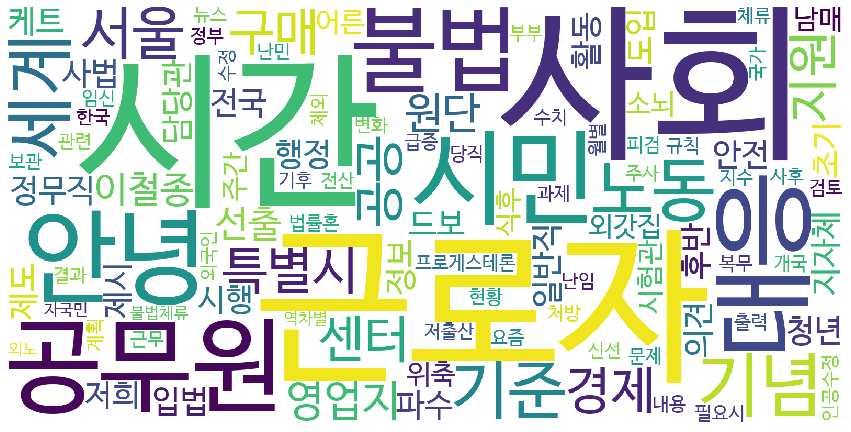

In [49]:
# 100개 이상의 투표를 받은 제안
content = df_vote_100["content"]
mecab_nouns_wordcloud(content)